In [47]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    h4{
        color:green;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
    th{
        background-color:blueviolet !important;
        text-align:center;
        color:white;
    }
    th,td{
        border:0.1px solid black !important;
        transition:0.2s all liner;
        
    }
    td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
    .raw{
        white-space:pre;
    }
    .atcenter{
        text-align:center !important;
    }
    .imp{
        color:red;
        font-weight:bolder;
    }
</style>

# 4.6 密度图与等高线图

有时在二维图上用等高线图或者彩色图来表示三维数据是个不错的方
法。Matplotlib 提供了三个函数来解决这个问题：用 <span class='imp'>plt.contour </span>画等
高线图、用 plt.contourf 画带有填充色的等高线图（filled contour
plot）的色彩、用 plt.imshow 显示图形。这节将用这三个函数介绍一
些示例。首先打开一个 Notebook，然后导入画图需要用的函数：


In [48]:
import matplotlib.pyplot as plt
import numpy as np

三维函数的可视化

首先用函数 z = f (x, y) 演示一个等高线图，按照下面的方式生成函数
f（在 2.5 节已经介绍过，当时用它来演示数组的广播功能）样本数据：

In [7]:
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

等高线图可以用 plt.contour 函数来创建。它需要三个参数：x 轴、y
轴、z 轴三个坐标轴的网格数据。x 轴与 y 轴表示图形中的位置，而 z 轴
将通过等高线的等级来表示。用 <span class='imp'>np.meshgrid</span> 函数来准备这些数据可
能是最简单的方法，它可以从一维数组构建二维网格数据：

In [10]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

现在来看看标准的线形等高线图（如图 4-30 所示）：

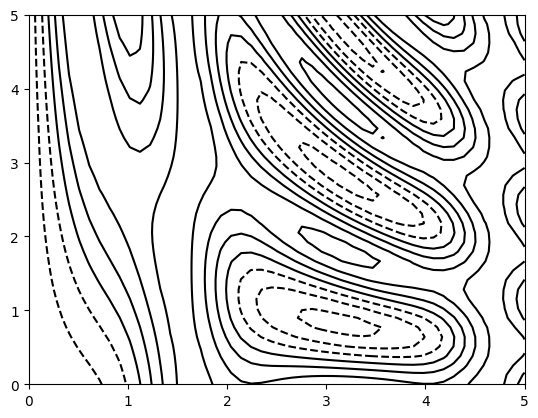

In [11]:
plt.contour(X,Y,Z,colors='black')

<p class='atcenter'>图 4-30：用等高线图可视化三维数据</p>

需要注意的是，当图形中只使用一种颜色时，默认使用虚线表示负数，
使用实线表示正数。另外，你可以用 cmap 参数设置一个线条配色方案
来自定义颜色。还可以让更多的线条显示不同的颜色——可以将数据范
围等分为 20 份，然后用不同的颜色表示（如图 4-31 所示）：

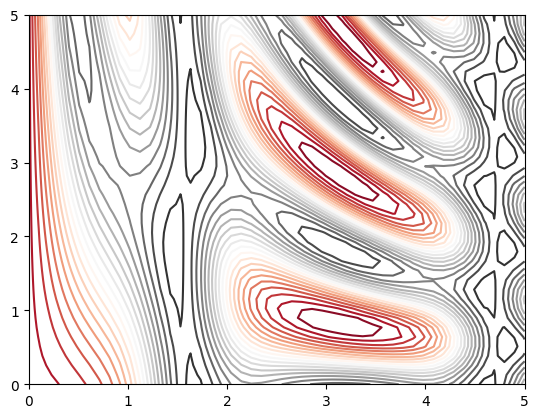

In [14]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

<p class='atcenter'>图 4-31：用彩色等高线可视化三维数据</p>

现在使用 RdGy（红 - 灰，Red-Gray 的缩写）配色方案，这对于数据集
中度的显示效果比较好。Matplotlib 有非常丰富的配色方案，你可以在
IPython 里用 Tab 键浏览 plt.cm 模块对应的信息：

```ipython
plt.cm.<TAB>
```

虽然这幅图看起来漂亮多了，但是线条之间的间隙还是有点大。我们可
以通过 plt.contourf() 函数来填充等高线图（需要注意结尾有字母
f），它的语法和 plt.contour() 是一样的。  
另外还可以通过 plt.colorbar() 命令自动创建一个表示图形各种颜色
对应标签信息的颜色条（如图 4-32 所示）：

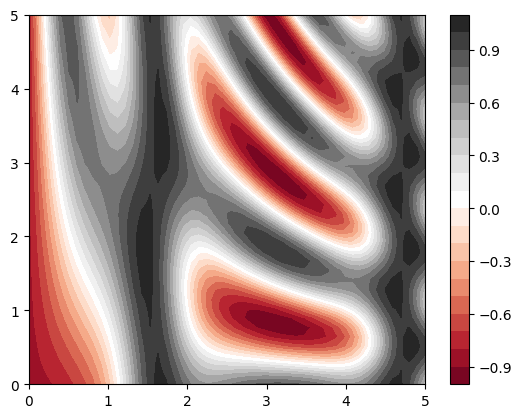

In [15]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();


<p class='atcenter'>图 4-32：带填充色的三维数据可视化图</p>

通过颜色条可以清晰地看出，黑色区域是“波峰”（peak），红色区域
是“波谷”（valley）。  
但是图形还有一点不尽如人意的地方，就是看起来有点儿“污渍斑斑”，
不是那么干净。这是由于颜色的改变是一个离散而非连续的过程，这并
不是我们想要的效果。你当然可以通过将等高线的数量设置得非常多来
解决这个问题，但是最终获得的图形性能会很不好，因为 Matplotlib 必
须渲染每一级的等高线。其实有更好的做法，那就是通过
plt.imshow() 函数来处理，它可以将二维数组渲染成渐变图。

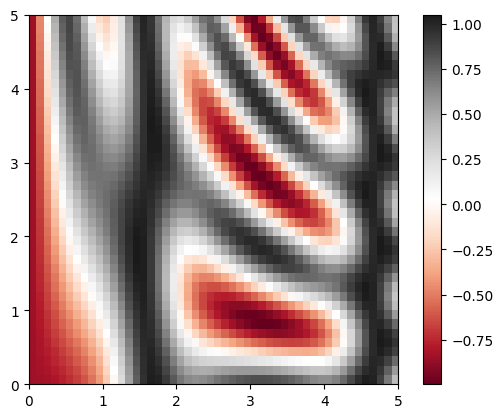

In [17]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy')
plt.colorbar()

<p class='atcenter'>图 4-33：重新渲染三维数据的彩色图</p>

但是，使用 imshow() 函数时有一些注意事项。

- plt.imshow() 不支持用 x 轴和 y 轴数据设置网格，而是必须通过
extent 参数设置图形的坐标范围 [xmin, xmax, ymin, ymax]。
- plt.imshow() 默认使用标准的图形数组定义，就是原点位于左上
角（浏览器都是如此），而不是绝大多数等高线图中使用的左下
角。这一点在显示网格数据图形的时候必须调整。
- plt.imshow() 会自动调整坐标轴的精度以适应数据显示。你可以
通过 plt.axis(aspect='image') 来设置 x 轴与 y 轴的单位。

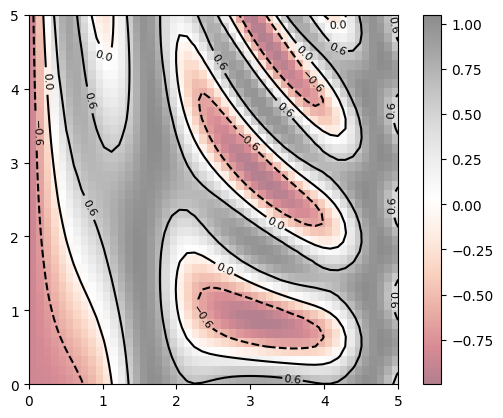

In [18]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();

<p class='atcenter'>图 4-34：在彩色图上加上带数据标签的等高线</p>

将 plt.contour、plt.contourf 与 plt.imshow 这三个函数组合起来
之后，就打开了用二维图画三维数据的无尽可能。关于这些函数的更多
信息，请参考相应的程序文档。如果对三维数据可视化感兴趣，请参见
4.14 节。

# 4.7 频次直方图、数据区间划分和分布密度

一个简易的频次直方图可以是理解数据集的良好开端。在前面的内容
中，我们见过了 Matplotlib 的频次直方图函数（详情请参见 2.6 节）。
只要导入了画图的函数，只用一行代码就可以创建一个简易的频次直方
图（如图 4-35 所示）：

In [21]:
data = np.random.randn(1000)

(array([  4.,  18.,  52., 123., 248., 241., 175.,  95.,  36.,   8.]),
 array([-3.28662427, -2.65819711, -2.02976994, -1.40134277, -0.7729156 ,
        -0.14448843,  0.48393873,  1.1123659 ,  1.74079307,  2.36922024,
         2.9976474 ]),
 <BarContainer object of 10 artists>)

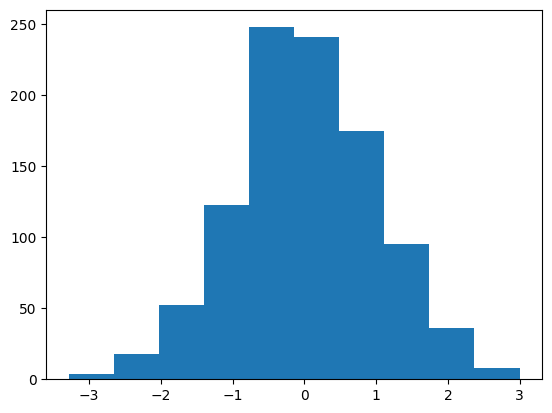

In [22]:
plt.hist(data)

<p class='atcenter'>图 4-35：一个简易的频次直方图</p>

(array([  3.,   1.,   0.,   4.,   5.,   9.,  13.,  14.,  25.,  32.,  36.,
         55.,  67.,  70., 111.,  75.,  80.,  86.,  67.,  55.,  53.,  42.,
         26.,  27.,  19.,  15.,   2.,   3.,   3.,   2.]),
 array([-3.28662427, -3.07714855, -2.86767283, -2.65819711, -2.44872138,
        -2.23924566, -2.02976994, -1.82029421, -1.61081849, -1.40134277,
        -1.19186705, -0.98239132, -0.7729156 , -0.56343988, -0.35396416,
        -0.14448843,  0.06498729,  0.27446301,  0.48393873,  0.69341446,
         0.90289018,  1.1123659 ,  1.32184162,  1.53131735,  1.74079307,
         1.95026879,  2.15974451,  2.36922024,  2.57869596,  2.78817168,
         2.9976474 ]),
 [<matplotlib.patches.Polygon at 0x211ad161070>])

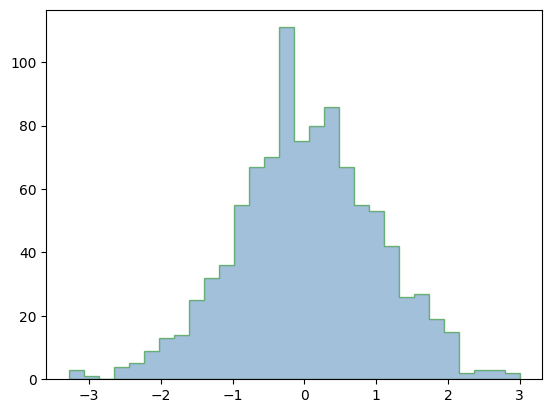

In [24]:
plt.hist(data, bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',edgecolor='g')

<p class='atcenter'>图 4-36：自定义的频次直方图</p>

关于 plt.hist 自定义选项的更多内容都在它的程序文档中。我发现在
用频次直方图对不同分布特征的样本进行对比时，将
histtype='stepfilled' 与透明性设置参数 alpha 搭配使用的效果非
常好（如图 4-37 所示）：

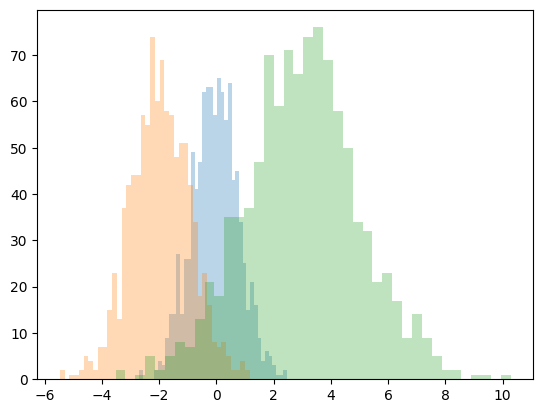

In [26]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

<p class='atcenter'>图 4-37：同坐标轴的多个频次直方图</p>

如果你只需要简单地计算频次直方图（就是计算每段区间的样本数），
而并不想画图显示它们，那么可以直接用 <span class='imp'>np.histogram()</span>：

```ipython
In[5]: counts, bin_edges = np.histogram(data, bins=5)
print(counts)
[ 12 190 468 301 29]

```

**二维频次直方图与数据区间划分**

就像将一维数组分为区间创建一维频次直方图一样，我们也可以将二维
数组按照二维区间进行切分，来创建二维频次直方图。下面将简单介绍
几种创建二维频次直方图的方法。首先，用一个多元高斯分布
（multivariate Gaussian distribution）生成 x 轴与 y 轴的样本数据：

In [29]:
 mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#### 01. plt.hist2d：二维频次直方图

画二维频次直方图最简单的方法就是使用 Matplotlib 的
plt.hist2d 函数（如图 4-38 所示）：

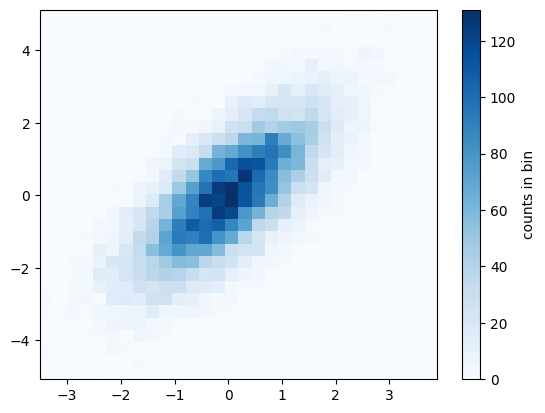

In [32]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

<p class='atcenter'>图 4-38：用 plt.hist2d 函数画二维频次直方图</p>

与 plt.hist 函数一样，plt.hist2d 也有许多调整图形与区间划
分的配置选项，详细内容都在程序文档中。另外，就像 plt.hist
有一个只计算结果不画图的 np.histogram 函数一
样，plt.hist2d 类似的函数是 np.histogram2d，其用法如下所
示：


```python
In[8]: counts, xedges, yedges = np.histogram2d(x, y, bins=30)
```

关于二维以上的频次直方图区间划分方法的具体内容，请参考
np.histogramdd 函数的程序文档。

#### 02. plt.hexbin：六边形区间划分

二维频次直方图是由与坐标轴正交的方块分割而成的，还有一种常
用的方式是用正六边形分割。Matplotlib 提供了 plt.hexbin 满足
此类需求，将二维数据集分割成蜂窝状（如图 4-39 所示）：

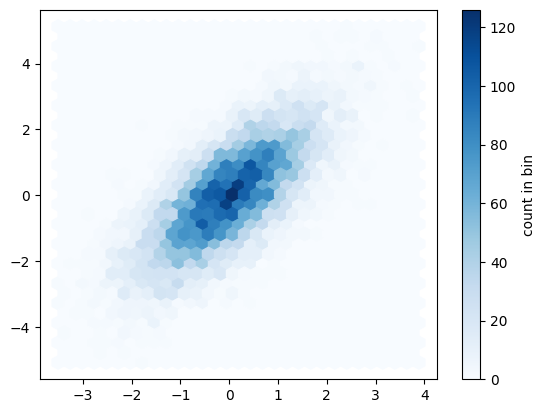

In [33]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

<p class='atcenter'>图 4-39：用 plt.hexbin 函数画二维频次直方图</p>

plt.hexbin 同样也有一大堆有趣的配置选项，包括为每个数据点
设置不同的权重，以及用任意 NumPy 累计函数改变每个六边形区
间划分的结果（权重均值、标准差等指标）。


#### 03. 核密度估计

还有一种评估多维数据分布密度的常用方法是核密度估计（kernel
density estimation，KDE）。我们将在 5.13 节详细介绍这种方法，
现在先来简单地演示如何用 KDE 方法“抹掉”空间中离散的数据
点，从而拟合出一个平滑的函数。在 scipy.stats 程序包里面有
一个简单快速的 KDE 实现方法，下面就是用这个方法演示的简单
示例（如图 4-40 所示）：

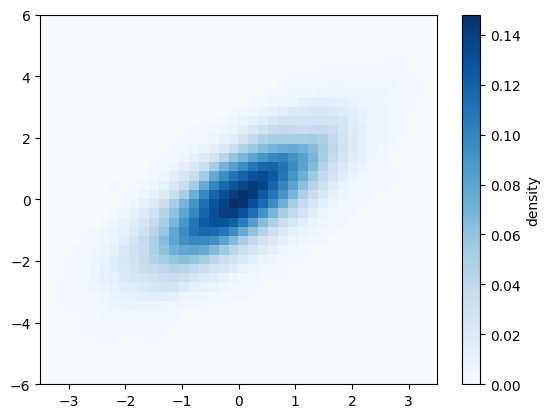

In [34]:
from scipy.stats import gaussian_kde
# 拟合数组维度[Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# 用一对规则的网格数据进行拟合
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# 画出结果图
plt.imshow(Z.reshape(Xgrid.shape),
origin='lower', aspect='auto',
extent=[-3.5, 3.5, -6, 6],
cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

<p class='atcenter'>图 4-40：用 KDE 表示分布密度</p>

KDE 方法通过不同的平滑带宽长度（smoothing length）在拟合函
数的准确性与平滑性之间作出权衡（无处不在的偏差与方差的取舍
问题的一个例子）。想找到恰当的平滑带宽长度是件很困难的
事，gaussian_kde 通过一种经验方法试图找到输入数据平滑长度
的近似最优解。   
在 SciPy 的生态系统中还有其他的 KDE 方法实现，每种版本都有
各自的优缺点，例如 sklearn.neighbors.KernelDensity 和
statsmodels.nonparametric.kernel_density.KDEMultivariate
用 Matplotlib 做 KDE 的可视化图的过程比较繁琐，Seaborn 程序库
（详情请参见 4.16 节）提供了一个更加简洁的 API 来创建基于
KDE 的可视化图。

# 4.8 配置图例

想在可视化图形中使用图例，可以为不同的图形元素分配标签。前面介
绍过如何创建简单的图例，现在将介绍如何在 Matplotlib 中自定义图例
的位置与艺术风格。
可以用 plt.legend() 命令来创建最简单的图例，它会自动创建一个包
含每个图形元素的图例（如图 4-41 所示）：


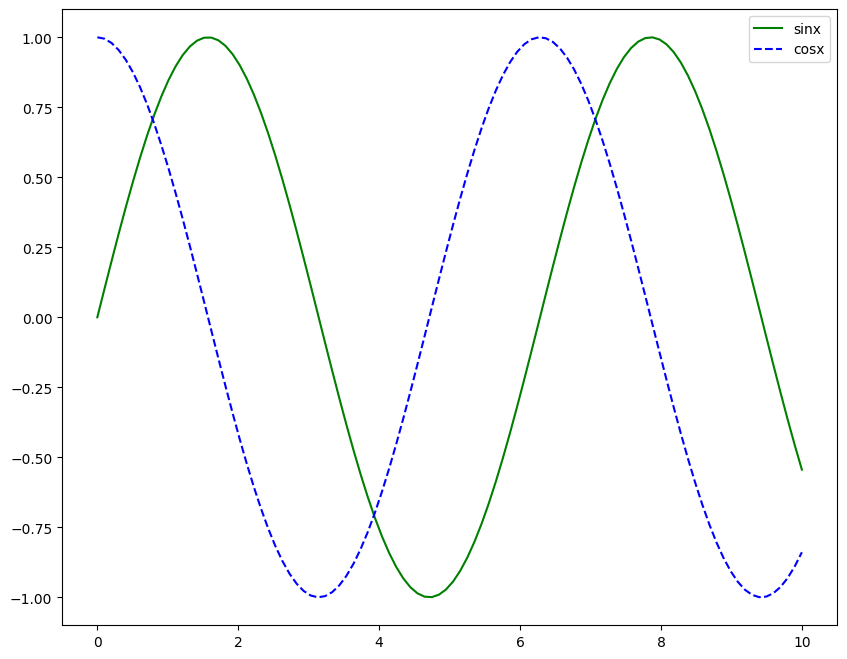

In [38]:
x = np.linspace(0,10,100)
plt.figure(figsize=(10,8),dpi=100)
plt.plot(x,np.sin(x),'-g',label='sinx')
plt.plot(x,np.cos(x),'--b',label='cosx')
plt.legend(loc='best')
plt.show()

<p class='atcenter'>图 4-41：图例的默认配置</p>

但是，我们经常需要对图例进行各种个性化的配置。例如，我们想设置
图例的位置，并取消外边框（如图 4-42 所示）：

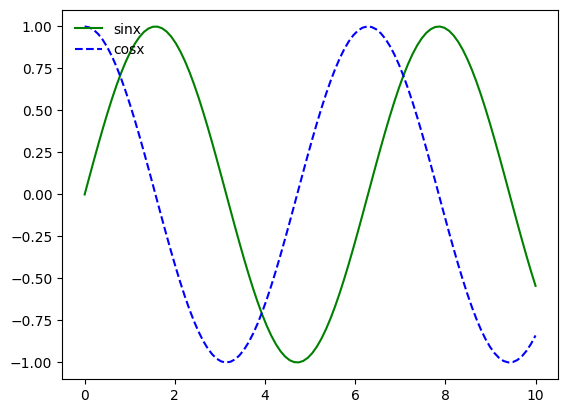

In [46]:
x = np.linspace(0,10,100)
# plt.figure(figsize=(1,1),dpi=100)
plt.plot(x,np.sin(x),'-g',label='sinx')
plt.plot(x,np.cos(x),'--b',label='cosx')
plt.legend(loc='upper left',frameon=False)

<p class='atcenter'>图 4-42：一个自定义的图例</p>

还可以用 ncol 参数设置图例的标签列数（如图 4-43 所示）：


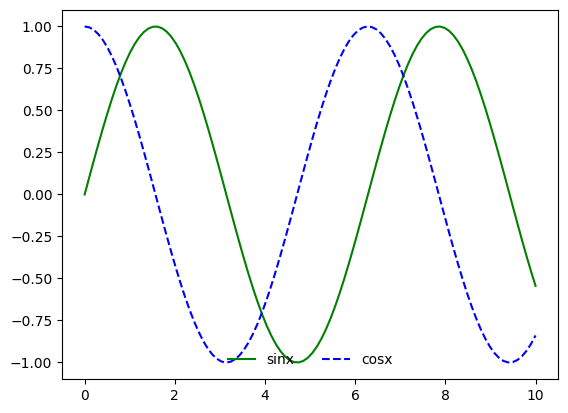

In [49]:
x = np.linspace(0,10,100)
# plt.figure(figsize=(1,1),dpi=100)
plt.plot(x,np.sin(x),'-g',label='sinx')
plt.plot(x,np.cos(x),'--b',label='cosx')
plt.legend(loc='lower center',frameon=False,ncol=2)

<p class='atcenter'>图 4-43：分成两列的图例</p>

还可以为图例定义圆角边框（fancybox）、增加阴影、改变外边框透
明度（framealpha 值），或者改变文字间距（如图 4-44 所示）：

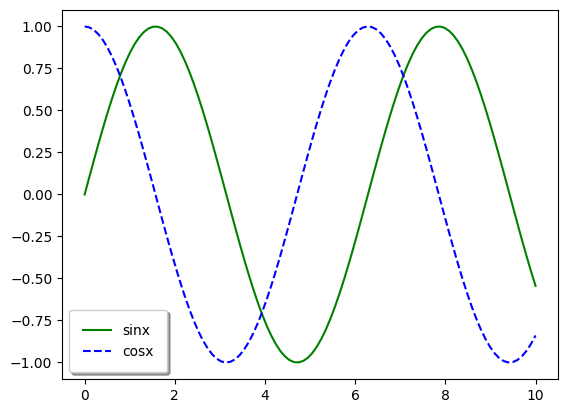

In [52]:
x = np.linspace(0,10,100)
# plt.figure(figsize=(1,1),dpi=100)
plt.plot(x,np.sin(x),'-g',label='sinx')
plt.plot(x,np.cos(x),'--b',label='cosx')
plt.legend(loc='best',borderpad=1,fancybox=True,shadow=True)

In [53]:
plt.legend?

Signature: plt.legend(*args, **kwargs) -> 'Legend'
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for a

<p class='atcenter'>图 4-44：圆角边框的图例</p>

### 4.8.1 选择图例显示的元素


我们已经看到，图例会默认显示所有元素的标签。如果你不想显示全
部，可以通过一些图形命令来指定显示图例中的哪些元素和标
签。plt.plot() 命令可以一次创建多条线，返回线条实例列表。一种
方法是将需要显示的线条传入 plt.legend()，另一种方法是只为需要
在图例中显示的线条设置标签（如图 4-45 所示）：

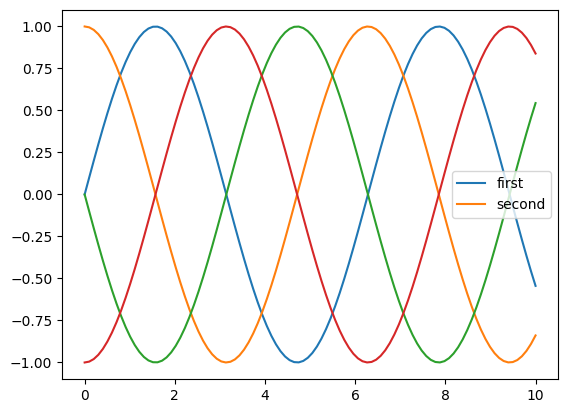

In [54]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
# lines变量是一组plt.Line2D实例
plt.legend(lines[:2], ['first', 'second']);

<p class='atcenter'>图 4-45：一种自定义显示哪些图例元素的方法</p>

在实践中，我发现第一种方法更清晰。当然也可以只为需要在图例中显
示的元素设置标签（如图 4-46 所示）：

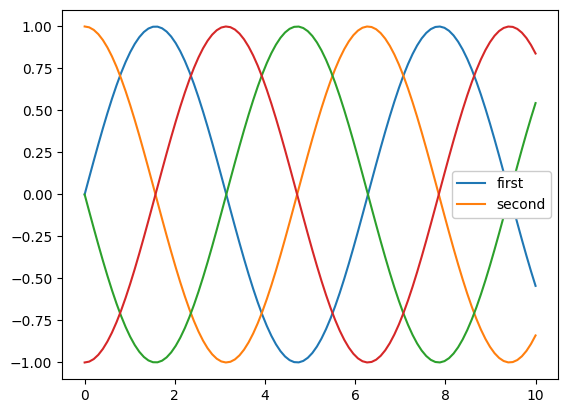

In [56]:
# 推荐这样写，这样可读性更好些,而且像原来那样加上label更加简单明了
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

<p class='atcenter'>图 4-46：另一种自定义显示哪些图例元素的方法</p>

需要注意的是，默认情况下图例会忽略那些不带标签的元素

### 4.8.2 在图例中显示不同尺寸的点

有时，默认的图例仍然不能满足我们的可视化需求。例如，你可能需要
用不同尺寸的点来表示数据的特征，并且希望创建这样的图例来反映这
些特征。下面的示例将用点的尺寸来表明美国加州不同城市的人口数
量。如果我们想要一个通过不同尺寸的点显示不同人口数量级的图例，
可以通过隐藏一些数据标签来实现这个效果（如图 4-47 所示）：

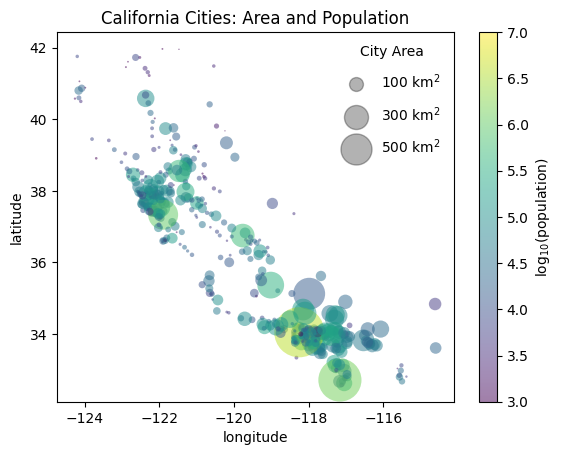

In [60]:
import pandas as pd
cities = pd.read_csv('../data/california.csv')
# 提取感兴趣的数据
lat,lon=cities['latd'],cities['longd']
population, area = cities['population_total'], cities['area_total_km2']
# 用不同尺寸和颜色的散点图表示数据，但是不带标签
plt.scatter(lon, lat, label=None,
c=np.log10(population), cmap='viridis',
s=area, linewidth=0, alpha=0.5)
# plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7) #colorbarlim
# 下面创建一个图例：
# 画一些带标签和尺寸的空列表
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');

In [ ]:
#376